In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [3]:
%store -r data_resampled
data = data_resampled
data.head()

,hours_learning_week,months_programming,attended_bootcamp,coding_expenses,age,employment,youtube,online_resources,inperson_events,podcasts,gender_female,gender_male,gender_other,is_sofw_dev
0,5,9,0,25,34,1,0,4,0,0,0,1,0,0
1,20,6,0,300,34,1,0,5,1,0,0,1,0,0
2,2,12,0,0,34,1,0,7,1,0,1,0,0,0
3,5,0,0,0,32,1,0,2,0,0,0,1,0,0
4,20,6,0,0,43,0,0,3,0,0,0,1,0,0


In [4]:
data.shape

(19678, 14)

In [5]:
data.describe()

,hours_learning_week,months_programming,attended_bootcamp,coding_expenses,age,employment,youtube,online_resources,inperson_events,podcasts,gender_female,gender_male,gender_other,is_sofw_dev
count,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000
mean,12.605600,19.577345,0.058288,501.509808,27.946387,0.721669,1.248247,4.250635,0.945218,0.565606,0.182285,0.808212,0.005488,0.500000
std,11.228607,21.891642,0.234294,1521.408998,6.936196,0.524860,1.787915,2.636928,1.095643,1.066732,0.386089,0.393717,0.073882,0.500013
min,0.000000,0.000000,0.000000,0.000000,17.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000,0.000000,23.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,10.000000,12.000000,0.000000,10.000000,26.000000,1.000000,1.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.500000
75%,20.000000,30.000000,0.000000,200.000000,31.000000,1.000000,2.000000,6.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,55.000000,115.000000,1.000000,11500.000000,52.000000,1.000000,17.000000,19.000000,16.000000,19.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
data.is_sofw_dev.value_counts()

1    9839
0    9839
Name: is_sofw_dev, dtype: int64

In [7]:
list(data.columns)

['hours_learning_week',
 'months_programming',
 'attended_bootcamp',
 'coding_expenses',
 'age',
 'employment',
 'youtube',
 'online_resources',
 'inperson_events',
 'podcasts',
 'gender_female',
 'gender_male',
 'gender_other',
 'is_sofw_dev']

In [8]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler   # what's the difference??

# initialization of the scale
scaler = MinMaxScaler(feature_range=(0,1))

# apply the scale/model to the dataset.  
data['coding_expenses'] = scaler.fit_transform(data['coding_expenses'].values.reshape(-1, 1)) 

data.describe()

,hours_learning_week,months_programming,attended_bootcamp,coding_expenses,age,employment,youtube,online_resources,inperson_events,podcasts,gender_female,gender_male,gender_other,is_sofw_dev
count,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000
mean,12.605600,19.577345,0.058288,0.043610,27.946387,0.721669,1.248247,4.250635,0.945218,0.565606,0.182285,0.808212,0.005488,0.500000
std,11.228607,21.891642,0.234294,0.132296,6.936196,0.524860,1.787915,2.636928,1.095643,1.066732,0.386089,0.393717,0.073882,0.500013
min,0.000000,0.000000,0.000000,0.000000,17.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000,0.000000,23.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,10.000000,12.000000,0.000000,0.000870,26.000000,1.000000,1.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.500000
75%,20.000000,30.000000,0.000000,0.017391,31.000000,1.000000,2.000000,6.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,55.000000,115.000000,1.000000,1.000000,52.000000,1.000000,17.000000,19.000000,16.000000,19.000000,1.000000,1.000000,1.000000,1.000000


(array([17998.,   602.,   249.,   141.,   207.,    80.,   131.,    45.,
          168.,    57.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

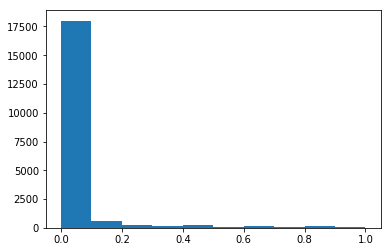

In [9]:
plt.hist(data['coding_expenses'])

In [10]:
data.describe()

,hours_learning_week,months_programming,attended_bootcamp,coding_expenses,age,employment,youtube,online_resources,inperson_events,podcasts,gender_female,gender_male,gender_other,is_sofw_dev
count,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000,19678.000000
mean,12.605600,19.577345,0.058288,0.043610,27.946387,0.721669,1.248247,4.250635,0.945218,0.565606,0.182285,0.808212,0.005488,0.500000
std,11.228607,21.891642,0.234294,0.132296,6.936196,0.524860,1.787915,2.636928,1.095643,1.066732,0.386089,0.393717,0.073882,0.500013
min,0.000000,0.000000,0.000000,0.000000,17.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000,0.000000,23.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,10.000000,12.000000,0.000000,0.000870,26.000000,1.000000,1.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.500000
75%,20.000000,30.000000,0.000000,0.017391,31.000000,1.000000,2.000000,6.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,55.000000,115.000000,1.000000,1.000000,52.000000,1.000000,17.000000,19.000000,16.000000,19.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
data.is_sofw_dev.value_counts()

1    9839
0    9839
Name: is_sofw_dev, dtype: int64

In [12]:
y = data['is_sofw_dev']

X = data.drop(['is_sofw_dev', 'gender_female','gender_male','gender_other'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=29)

In [13]:
acc_dict = {}

## Decision Tree Classifier

In [14]:
X.shape

(19678, 10)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

param_grid = {'max_depth': np.arange(2,12), 
              'min_samples_split': np.arange(2,10), 
              'min_samples_leaf': np.arange(1,10),  
              }

tree = GridSearchCV(DecisionTreeClassifier(), param_grid)

tree.fit(X_train, y_train)
tree_preds = tree.predict_proba(X_test)[:, 1]
tree_performance = roc_auc_score(y_test, tree_preds)

print (f'DecisionTree: Area under the ROC curve = {tree_performance}')


/home/inrx/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTree: Area under the ROC curve = 0.8600734998795083


In [16]:
tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 2}

In [17]:
tree.best_score_

0.7933062291273414

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, min_samples_split=2)
dtc.fit(X_train, y_train)

acc_dtc = dtc.score(X_test, y_test)*100
print(f"Decision Tree Test Accuracy {round(acc_dtc, 2)}%")

#acc_dict['Decision Tree Classifier'] = round(acc_dtc,2)

Decision Tree Test Accuracy 79.73%


### Test for overfitting

In [19]:
prediction = dtc.predict(X_test)

print (dtc.score(X_train, y_train)*100)

print (roc_auc_score(y_test, prediction)*100)

80.23086975461014
79.72657585807237


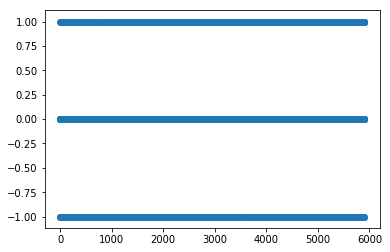

In [20]:
x_plot = list(range(len(X_test)))
prediction = dtc.predict(X_test)
plt.scatter(x_plot,prediction-y_test, label = 'prediction', alpha = 1)
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(
    confusion_matrix(y_test, prediction),
    columns=['Predicted Not StwDev', 'Predicted StwDev'],
    index=['True Not StwDev', 'True StwDev'])

cm

,Predicted Not StwDev,Predicted StwDev
True Not StwDev,2394,556
True StwDev,641,2313


In [22]:
cm1 = round(cm/19678*100,2)

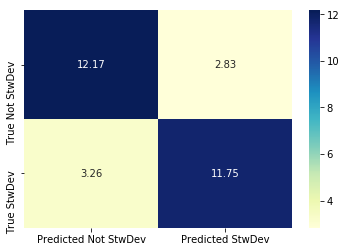

In [23]:
sns.heatmap(cm1,cmap="YlGnBu", annot=True, fmt='g')

In [24]:
from sklearn.tree.export import export_text
r = export_text(dtc, feature_names=list(X.columns))

In [25]:
print (r)

|--- months_programming <= 7.50
|   |--- months_programming <= 3.50
|   |   |--- employment <= 0.50
|   |   |   |--- inperson_events <= 0.50
|   |   |   |   |--- podcasts <= 1.50
|   |   |   |   |   |--- online_resources <= 4.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- online_resources >  4.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- podcasts >  1.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- inperson_events >  0.50
|   |   |   |   |--- employment <= -0.50
|   |   |   |   |   |--- hours_learning_week <= 9.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- hours_learning_week >  9.00
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- employment >  -0.50
|   |   |   |   |   |--- age <= 18.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- age >  18.50
|   |   |   |   |   |   |--- class: 0
|   |   |--- employment >  0.50
|   |   |   |--- attended_bootcamp <= 0.50
|   |   |   |   |--- online_resources <= 

In [27]:
TP = cm['Predicted Not StwDev']['True Not StwDev']
FP = cm['Predicted StwDev']['True Not StwDev']
FN = cm['Predicted Not StwDev']['True StwDev']

print (f'Precision: {round(TP/(TP+FP)*100,2)}')
print (f'Recall: {round(TP/(TP+FN)*100,2)}')


Precision: 81.15
Recall: 78.88


In [28]:
data1 = data

%store data1

Stored 'data1' (DataFrame)
